### Imports and load data

In [ ]:
# Import files
import numpy as np
import pandas as pd
from scipy import stats
from sklearn.cluster import KMeans
from scipy.stats import zscore
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.metrics import f1_score, make_scorer

In [ ]:
# run this cell to to mount the google drive if you are using google colab
from google.colab import drive
drive.mount('/content/drive')
project_path = '/content/drive/My Drive/assignments/'

Mounted at /content/drive


### Data pre-processing

In [ ]:
#Loading data
vehicle = pd.read_csv(project_path + "vehicle.csv")

In [ ]:
vehicle.head()

compactness  circularity  ...  hollows_ratio  class
0           95         48.0  ...            197    van
1           91         41.0  ...            199    van
2          104         50.0  ...            196    car
3           93         41.0  ...            207    van
4           85         44.0  ...            183    bus

[5 rows x 19 columns]

In [ ]:
vehicle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  846 non-null    int64  
 1   circularity                  841 non-null    float64
 2   distance_circularity         842 non-null    float64
 3   radius_ratio                 840 non-null    float64
 4   pr.axis_aspect_ratio         844 non-null    float64
 5   max.length_aspect_ratio      846 non-null    int64  
 6   scatter_ratio                845 non-null    float64
 7   elongatedness                845 non-null    float64
 8   pr.axis_rectangularity       843 non-null    float64
 9   max.length_rectangularity    846 non-null    int64  
 10  scaled_variance              843 non-null    float64
 11  scaled_variance.1            844 non-null    float64
 12  scaled_radius_of_gyration    844 non-null    float64
 13  scaled_radius_of_gyr

We can see that there are 846 rows of records in the dataframe, however there are a few records which are not there in the cell means some of the values are not there (null values). 

Let's fill in these values with the median values

In [ ]:
vehicle.iloc[:, :-1] = vehicle.iloc[:, :-1].apply(lambda x: x.fillna(x.median()))

In [ ]:
vehicle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  846 non-null    int64  
 1   circularity                  846 non-null    float64
 2   distance_circularity         846 non-null    float64
 3   radius_ratio                 846 non-null    float64
 4   pr.axis_aspect_ratio         846 non-null    float64
 5   max.length_aspect_ratio      846 non-null    int64  
 6   scatter_ratio                846 non-null    float64
 7   elongatedness                846 non-null    float64
 8   pr.axis_rectangularity       846 non-null    float64
 9   max.length_rectangularity    846 non-null    int64  
 10  scaled_variance              846 non-null    float64
 11  scaled_variance.1            846 non-null    float64
 12  scaled_radius_of_gyration    846 non-null    float64
 13  scaled_radius_of_gyr

We can see all the values are filled now and no null values are there.

Let's describe the dataframe

In [ ]:
vehicle.describe()

compactness  circularity  ...  skewness_about.2  hollows_ratio
count   846.000000   846.000000  ...        846.000000     846.000000
mean     93.678487    44.823877  ...        188.918440     195.632388
std       8.234474     6.134272  ...          6.152247       7.438797
min      73.000000    33.000000  ...        176.000000     181.000000
25%      87.000000    40.000000  ...        184.000000     190.250000
50%      93.000000    44.000000  ...        188.000000     197.000000
75%     100.000000    49.000000  ...        193.000000     201.000000
max     119.000000    59.000000  ...        206.000000     211.000000

[8 rows x 18 columns]

We can see that some of the fields like radius_ratio, pr.axis_aspect_ratio, max.length_aspect_ratio, scaled_variance, scaled_variance.1 etc.. seems to have some outliars and they must be treated accordingly.

Let's do a box plot to see it grapically.

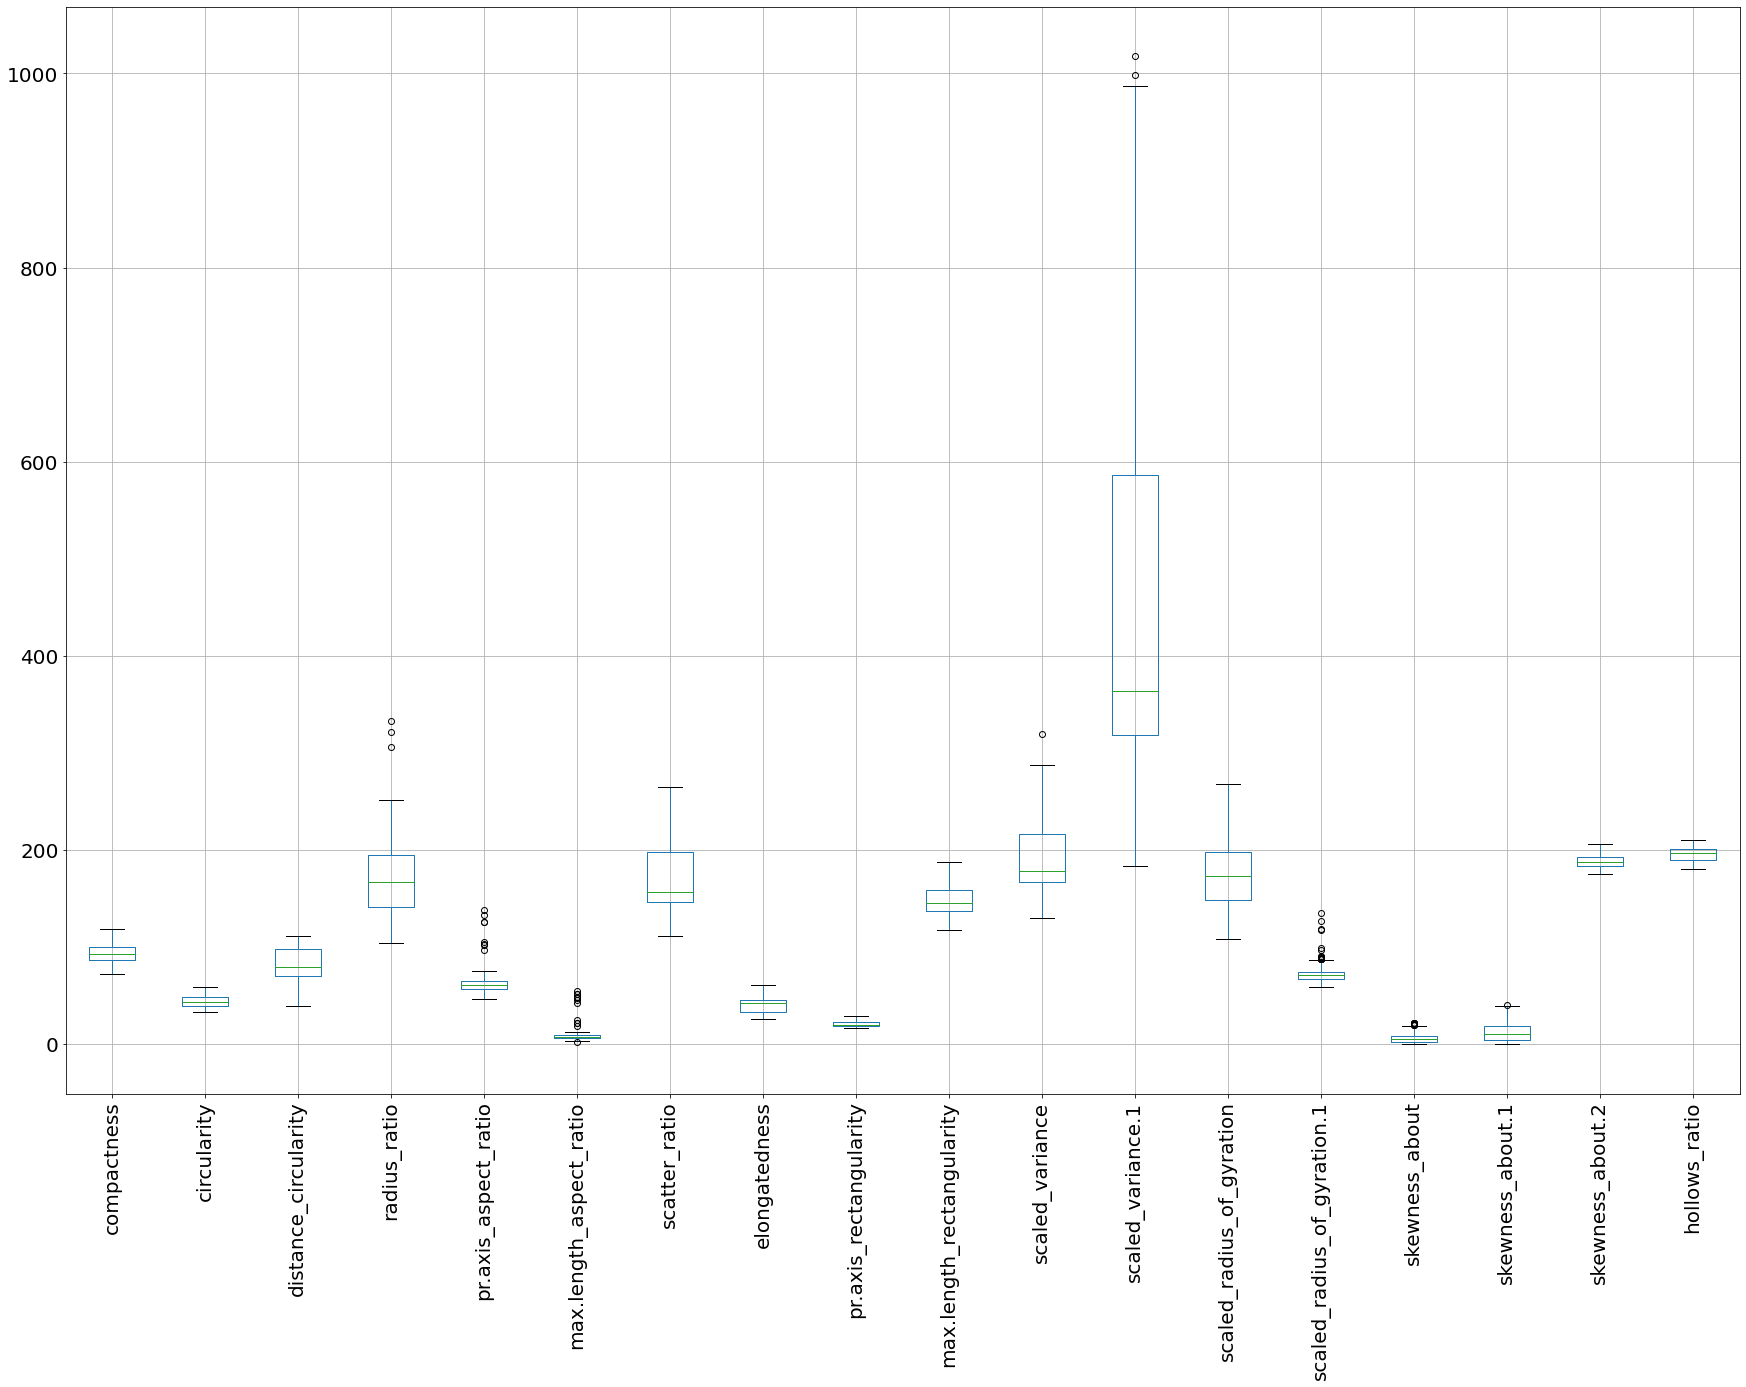

In [ ]:
vehicle.boxplot(figsize=(30, 20), rot=90, fontsize=20)

As can be seen there are a few fields which are having outliars like - radius_rato, pr.axis_aspect_ratio, max.length_aspect_ration, scaled_variance, scaled_variance.1, scaled_radius_of_gyration.1, skewness_about.1, skewness_about.1

We need to treat these outliars. We will drop these values.

Min range outliers = Q1 - 1.5IQR = Q1 - 1.5(Q2-Q1)

Max range outliers = Q2 + 1.5IQR = Q1 + 1.5(Q2-Q1)

In [ ]:
# Treating the outliers by dropping the values.
for label in vehicle:
  if (label != 'class'): #Do not consider the class column
    IQR = vehicle.describe()[label]['75%'] - vehicle.describe()[label]['25%']
    vehicle = vehicle[vehicle[label] > (vehicle.describe()[label]['25%'] - 1.5*IQR)]
    vehicle = vehicle[vehicle[label] < (vehicle.describe()[label]['75%'] + 1.5*IQR)]

In [ ]:
vehicle.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 801 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  801 non-null    int64  
 1   circularity                  801 non-null    float64
 2   distance_circularity         801 non-null    float64
 3   radius_ratio                 801 non-null    float64
 4   pr.axis_aspect_ratio         801 non-null    float64
 5   max.length_aspect_ratio      801 non-null    int64  
 6   scatter_ratio                801 non-null    float64
 7   elongatedness                801 non-null    float64
 8   pr.axis_rectangularity       801 non-null    float64
 9   max.length_rectangularity    801 non-null    int64  
 10  scaled_variance              801 non-null    float64
 11  scaled_variance.1            801 non-null    float64
 12  scaled_radius_of_gyration    801 non-null    float64
 13  scaled_radius_of_gyr

There are about 45 rows of values dropped and not 801 clean rows of data in place. Lets describe it.

In [ ]:
vehicle.describe()

compactness  circularity  ...  skewness_about.2  hollows_ratio
count   801.000000   801.000000  ...        801.000000     801.000000
mean     93.717853    44.873908  ...        189.101124     195.840200
std       8.031207     6.137820  ...          6.038502       7.225609
min      73.000000    33.000000  ...        176.000000     182.000000
25%      88.000000    40.000000  ...        185.000000     191.000000
50%      93.000000    44.000000  ...        189.000000     197.000000
75%     100.000000    49.000000  ...        193.000000     201.000000
max     116.000000    59.000000  ...        204.000000     211.000000

[8 rows x 18 columns]

As can be seen the data looks more consistent now.

### Understanding the attributes - Find relationship between different attributes

In [ ]:
vehicle.corr()

compactness  ...  hollows_ratio
compactness                     1.000000  ...       0.346519
circularity                     0.681179  ...       0.020571
distance_circularity            0.783074  ...       0.301529
radius_ratio                    0.741349  ...       0.487874
pr.axis_aspect_ratio            0.190601  ...       0.409563
max.length_aspect_ratio         0.486861  ...       0.374798
scatter_ratio                   0.809463  ...       0.098782
elongatedness                  -0.786167  ...      -0.193708
pr.axis_rectangularity          0.810790  ...       0.081015
max.length_rectangularity       0.671443  ...       0.052902
scaled_variance                 0.790042  ...       0.077738
scaled_variance.1               0.811283  ...       0.085514
scaled_radius_of_gyration       0.579187  ...      -0.129643
scaled_radius_of_gyration.1    -0.228486  ...      -0.914905
skewness_about                  0.196243  ...       0.053202
skewness_about.1                0.153901  ...       0.177516
skewness_about.2                0.276099  ...       0.886592
hollows_ratio                   0.346519  ...       1.000000

[18 rows x 18 columns]

As can be seen from the correlation matrix some of the features are weakly correlated to any of the features like - skewness_about.1, skewness_about

Rest all features seems to be having some kind of relation to 1 or more features

Let's try to do a pair plot to observe the same

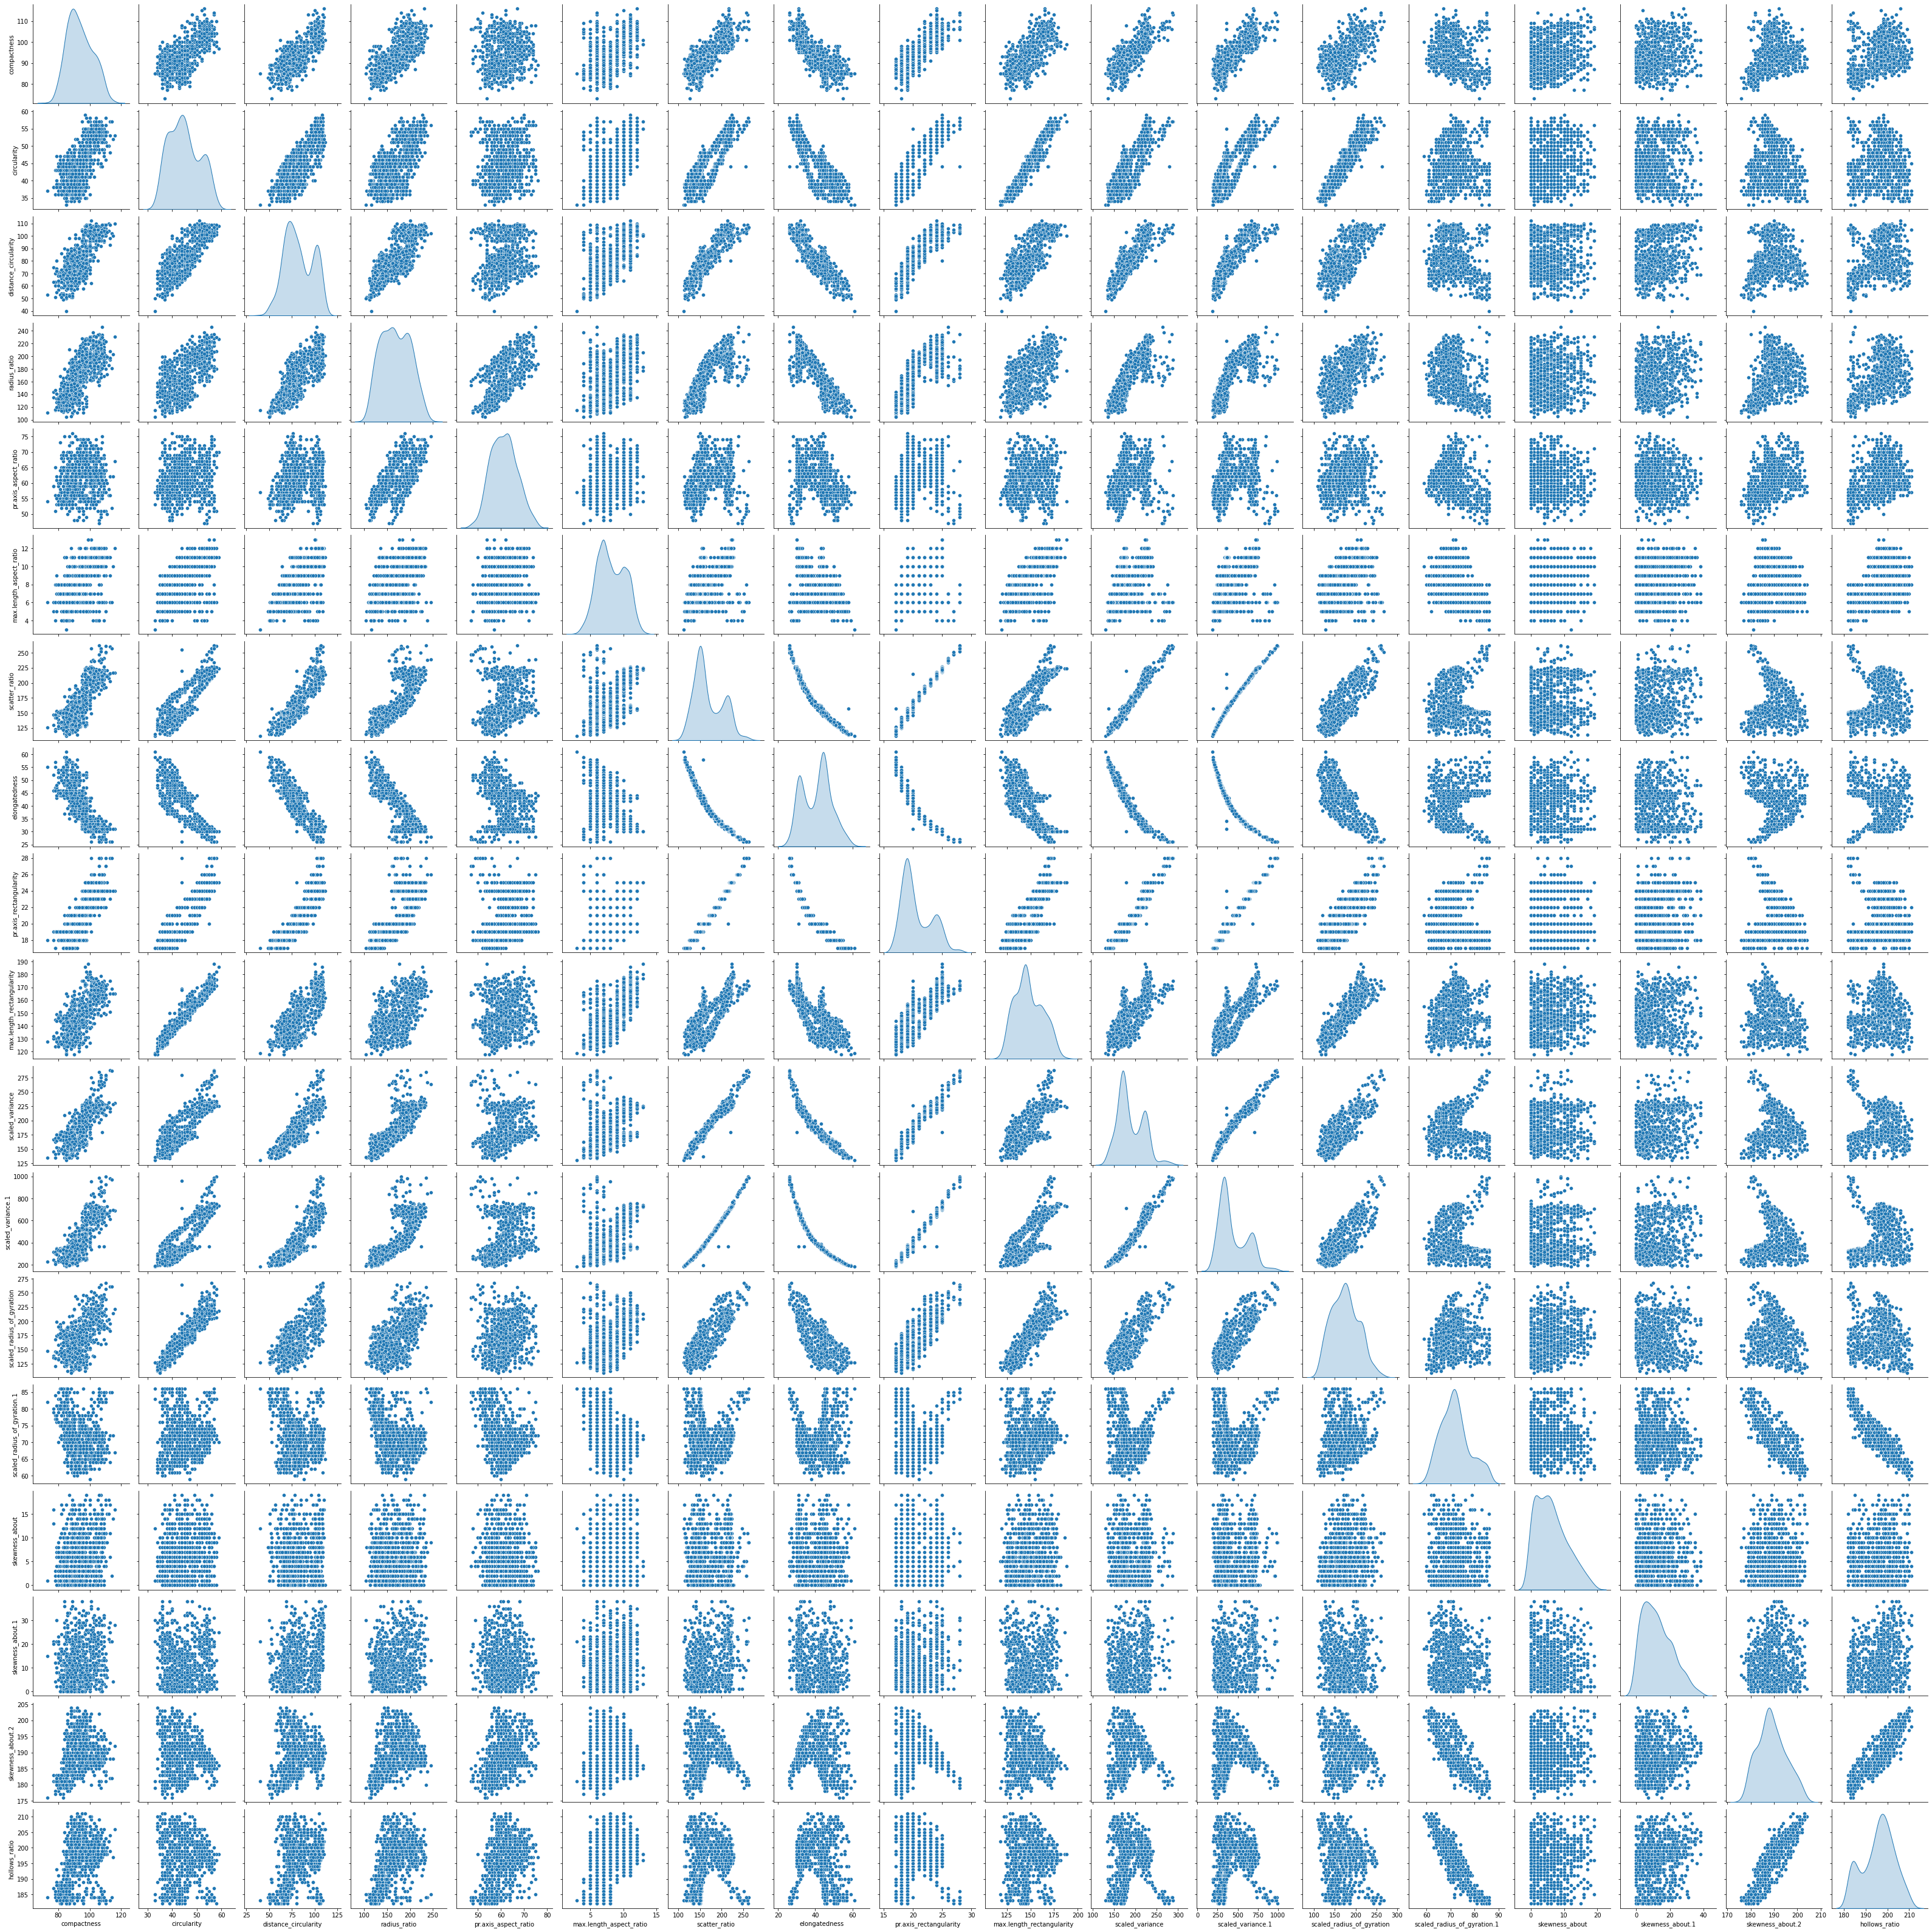

In [ ]:
# Pairplot of all the columns
sns.pairplot(vehicle, diag_kind="kde", )

As can be observed from the graph as well, the skewness_about.1, skewness_about are the features with no relation with any other features as we can see the paitplot has almost cloud like spread for all other features.

###  Use PCA from scikit learn and elbow plot to find out reduced number of dimension

In [ ]:
X = vehicle.drop(['skewness_about', 'skewness_about.1', 'class'], axis=1)
y = vehicle["class"]

As we can see we have dropped the 2 columns which had least correlation with other columns.

In [ ]:
# We transform (centralize) the entire X (independent variable data) to zscores through transformation. We will create the PCA dimensions
# on this distribution. 
sc = StandardScaler()
X_std =  sc.fit_transform(X)          
cov_matrix = np.cov(X_std.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[ 1.00125     0.6820309   0.78405259  0.74227606  0.19083911  0.4874697
   0.81047449 -0.78714971  0.81180376  0.67228215  0.79102951  0.81229689
   0.5799107  -0.22877176  0.27644395  0.34695182]
 [ 0.6820309   1.00125     0.78931113  0.63986253  0.19579719  0.55736215
   0.84923993 -0.81909333  0.84666388  0.96389045  0.80941003  0.83897005
   0.93143236  0.09581471 -0.13790252  0.02059698]
 [ 0.78405259  0.78931113  1.00125     0.80556652  0.23540693  0.66365071
   0.90662773 -0.9087174   0.89646303  0.76796723  0.8845952   0.88901217
   0.7055287  -0.20855287  0.10180217  0.30190632]
 [ 0.74227606  0.63986253  0.80556652  1.00125     0.6624979   0.44799068
   0.78946486 -0.84457152  0.76376941  0.57464025  0.79323498  0.77554997
   0.55371321 -0.37807297  0.39941785  0.48848375]
 [ 0.19083911  0.19579719  0.23540693  0.6624979   1.00125     0.12458654
   0.19343354 -0.29644537  0.16326419  0.14032584  0.20870889  0.17905458
   0.15144233 -0.3072255   0.395986

In [ ]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eigenvectors)
print('\n Eigen Values \n%s', eigenvalues)

Eigen Vectors 
%s [[ 0.2714486   0.09643175  0.05900018  0.28426034  0.11214811 -0.82186446
  -0.32225606  0.07450681 -0.01847281  0.01858316 -0.00911426  0.14204467
  -0.11736842  0.00666198 -0.02151507 -0.0080019 ]
 [ 0.28913283 -0.12318918  0.0897374  -0.2387937   0.39183366  0.0453379
  -0.00823153 -0.23085386 -0.06669535 -0.13443774 -0.00517115  0.17483632
   0.18565156 -0.10956158  0.1374761  -0.71324247]
 [ 0.30139387  0.04754346  0.12142117  0.04595923 -0.2567683   0.22442479
  -0.3008457   0.12668757 -0.7947129   0.08799702  0.00428002 -0.10977267
  -0.01667603  0.02585795  0.12183662 -0.00451226]
 [ 0.27152537  0.21366288 -0.29044456 -0.0884312  -0.1716876   0.00372443
  -0.18163517 -0.0932453   0.14912895 -0.20966551 -0.04093261  0.11285673
   0.72676503  0.03693342  0.17663956  0.27550552]
 [ 0.09543785  0.26691991 -0.57790349 -0.61219437 -0.14287957 -0.18211671
   0.01220152 -0.03278972 -0.06601555  0.12049355  0.02373508 -0.10623306
  -0.32631889 -0.01244723 -0.0946738  -

In [ ]:
# Step 3 (continued): Sort eigenvalues in descending order

# Make a set of (eigenvalue, eigenvector) pairs
eig_pairs = [(eigenvalues[index], eigenvectors[:,index]) for index in range(len(eigenvalues))]

# Sort the (eigenvalue, eigenvector) pairs from highest to lowest with respect to eigenvalue
eig_pairs.sort()

eig_pairs.reverse()
print(eig_pairs)

# Extract the descending ordered eigenvalues and eigenvectors
eigvalues_sorted = [eig_pairs[index][0] for index in range(len(eigenvalues))]
eigvectors_sorted = [eig_pairs[index][1] for index in range(len(eigenvalues))]

# Let's confirm our sorting worked, print out eigenvalues
print('Eigenvalues in descending order: \n%s' %eigvalues_sorted)

[(9.718667133636956, array([ 0.2714486 ,  0.28913283,  0.30139387,  0.27152537,  0.09543785,
        0.19213485,  0.31221627, -0.30976582,  0.30936189,  0.27868544,
        0.30450836,  0.30879849,  0.26574398, -0.02970447,  0.02307161,
        0.07217207])), (3.353574830845906, array([ 0.09643175, -0.12318918,  0.04754346,  0.21366288,  0.26691991,
        0.09260313, -0.06488434,  0.00276093, -0.07691673, -0.11459092,
       -0.06328153, -0.07065419, -0.19559472, -0.50794172,  0.50706031,
        0.51201357])), (1.039191989731738, array([ 0.05900018,  0.0897374 ,  0.12142117, -0.29044456, -0.57790349,
        0.60952638, -0.0610178 ,  0.1121651 , -0.03610957,  0.22495668,
       -0.14879678, -0.08157211, -0.02204983, -0.22519655, -0.08359735,
        0.16933369])), (0.8142678344223699, array([ 0.28426034, -0.2387937 ,  0.04595923, -0.0884312 , -0.61219437,
       -0.39768445,  0.159873  , -0.10922361,  0.17002775, -0.27114349,
        0.21365349,  0.19712335, -0.21387285, -0.04912376

In [ ]:
tot = sum(eigenvalues)
var_explained = [(i / tot) for i in sorted(eigenvalues, reverse=True)]  # an array of variance explained by each 
# eigen vector... there will be 8 entries as there are 8 eigen vectors)
cum_var_exp = np.cumsum(var_explained)  # an array of cumulative variance. There will be 8 entries with 8 th entry 
# cumulative reaching almost 100%

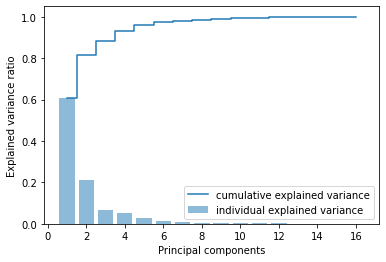

In [ ]:
plt.bar(range(1,17), var_explained, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,17),cum_var_exp, where= 'mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc = 'best')

As can be seen from the graph that the number of dimentions we can use for 95% coverage of variance - 6

### Use Support vector machines and use grid search and find out the best hyper parameters and do cross validation to find the accuracy

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
f1 = make_scorer(f1_score , average='macro')

In [ ]:
clf = svm.SVC()
grid_values = {'kernel': ['linear', 'rbf'],'C':[0.01, 0.05, 0.5, 1]}
GS = GridSearchCV(clf, param_grid = grid_values, scoring = f1, cv=10)

In [ ]:
GS = GS.fit(X_train,y_train)

In [ ]:
GS.best_estimator_

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
GS.best_params_

{'C': 1, 'kernel': 'rbf'}

In [ ]:
GS.best_score_

0.9623956311722888

The best parameters is:
1. C value = 1
2. kernel = 'rbf'

The best score is .9623